# Heart Failure Prediction
`The goal is to predict heart failure rate of the patients based the available features.` 

## Midterm project- 2022 ML zoomcamp

`data location:` [Heart failure data](https://www.openml.org/search?type=data&status=active&id=43682)

### Description about dataset
Context Heart Disease Dataset (Most comprehensive) Content Heart disease is also known as Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year which is about 32 of all deaths globally. CVDs are a group of disorders of the heart and blood vessels and include coronary heart disease, cerebrovascular disease, rheumatic heart disease, and other conditions. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. We have curated this dataset by combining different datasets already available independently but not combined before. W have combined them over 11 common features which makes it the largest heart disease dataset available for research purposes. The five datasets used for its curation are: Database: of instances:

Cleveland: 303 Hungarian: 294 Switzerland: 123 Long Beach VA: 200 Stalog (Heart) Data Set: 270

Total 1190 Acknowledgements The dataset is taken from three other research datasets used in different research papers. The Nature article listing heart disease database and names of popular datasets used in various heart disease research is shared below. https://www.nature.com/articles/s41597-019-0206-3 Inspiration Can you find interesting insight from the largest heart disease dataset available so far and build predictive model which can assist medical practitioners in detecting early-stage heart disease

### Attribute Information

| Variable | Description | Metrics   |
:---        |    :----:   |            ---:|
| Age | age of the patient | years |
| Sex | sex of the patient | M = Male,F = Female |
| ChestPainType | TA = Typical Angina, ATA = Atypical Angina, NAP = Non-Anginal Pain, ASY = Asymptomatic | NA |
| RestingBP | resting blood pressure | mm Hg |
| Cholesterol | serum cholesterol | mm/dl |
| FastingBS | fasting blood sugar	`1 = if FastingBS > 120 mg/dl`, `0 = otherwise` | mg/dl |
|RestingECG | resting electrocardiogram results	Normal = Normal, ST = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH = showing probable or definite left ventricular hypertrophy by Estes' criteria|NA|
|MaxHR|	maximum heart rate achieved	Numeric value between 60 and 202
|ExerciseAngina|	exercise-induced angina	Y = Yes, N = No|NA|
|Oldpeak|	Oldpeak = ST	Numeric value measured in depression|NA|
|ST_Slope|	the slope of the peak exercise ST segment	Up = upsloping, Flat = flat, Down = downsloping|NA|

### Target variable

`HeartDisease`	output class : 1 = heart disease, 0 = Normal

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score
from tqdm.auto import tqdm
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb

C:\Users\460484\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head(10)

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,heart_diesease
0,40,1,ATA,140,289,0,0,172,0,0.0,1,0
1,49,0,NAP,160,180,0,0,156,0,1.0,2,1
2,37,1,ATA,130,283,0,1,98,0,0.0,1,0
3,48,0,ASY,138,214,0,0,108,1,1.5,2,1
4,54,1,NAP,150,195,0,0,122,0,0.0,1,0
5,39,1,NAP,120,339,0,0,170,0,0.0,1,0
6,45,0,ATA,130,237,0,0,170,0,0.0,1,0
7,54,1,ATA,110,208,0,0,142,0,0.0,1,0
8,37,1,ASY,140,207,0,0,130,1,1.5,2,1
9,48,0,ATA,120,284,0,0,120,0,0.0,1,0


### Categorical variables are represented by numbers.Lets convert them into strings as categorial variables

In [4]:
sex_values = {
    1: 'M',
    0: 'F',
}
df.sex = df.sex.map(sex_values)

fasting_blood_sugar_values = {
    0: '0',
    1: '1',
}
df.fasting_blood_sugar = df.fasting_blood_sugar.map(fasting_blood_sugar_values)

resting_ecg_values = {
    0: 'Normal',
    1: 'ST',
    2: 'LVH'
}
df.resting_ecg = df.resting_ecg.map(resting_ecg_values)

exercise_angina_values = {
    0: 'No',
    1: 'Yes'
}
df.exercise_angina = df.exercise_angina.map(exercise_angina_values)
ST_slope_values = {
    1: 'Up',
    2: 'Flat',
    3: 'Down'
}
df.ST_slope = df.ST_slope.map(ST_slope_values)


In [5]:
df.columns = df.columns.str.lower()
categorical = list(df.dtypes[df.dtypes == 'object'].index)

In [6]:
categorical

['sex',
 'chest_pain_type',
 'fasting_blood_sugar',
 'resting_ecg',
 'exercise_angina',
 'st_slope']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   object 
 2   chest_pain_type      1190 non-null   object 
 3   resting_bp_s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting_blood_sugar  1190 non-null   object 
 6   resting_ecg          1190 non-null   object 
 7   max_heart_rate       1190 non-null   int64  
 8   exercise_angina      1190 non-null   object 
 9   oldpeak              1190 non-null   float64
 10  st_slope             1189 non-null   object 
 11  heart_diesease       1190 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 111.7+ KB


### Perform the train/validation/test split with Scikit-Learn

In [8]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [9]:
len(df_train), len(df_val), len(df_test)

(714, 238, 238)

In [10]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [11]:
y_train = df_train.heart_diesease.values
y_val = df_val.heart_diesease.values
y_test = df_test.heart_diesease.values

del df_train['heart_diesease']
del df_val['heart_diesease']
del df_test['heart_diesease']

# EDA
* Filling the missing values
* Feature Importance

In [12]:
df_full_train = df_full_train.fillna('Down')

In [13]:
df_full_train.isnull().sum()

age                    0
sex                    0
chest_pain_type        0
resting_bp_s           0
cholesterol            0
fasting_blood_sugar    0
resting_ecg            0
max_heart_rate         0
exercise_angina        0
oldpeak                0
st_slope               0
heart_diesease         0
dtype: int64

In [14]:
df_full_train.heart_diesease.value_counts(normalize=True)

1    0.527311
0    0.472689
Name: heart_diesease, dtype: float64

In [15]:
df_full_train.mode()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slope,heart_diesease
0,54,M,ASY,120,0,0,Normal,140,No,0.0,Flat,1


In [16]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_bp_s', 'cholesterol',
       'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_angina', 'oldpeak', 'st_slope', 'heart_diesease'],
      dtype='object')

In [17]:
numerical = ['age', 'resting_bp_s', 'cholesterol','max_heart_rate','oldpeak']
numerical

['age', 'resting_bp_s', 'cholesterol', 'max_heart_rate', 'oldpeak']

In [18]:
categorical

['sex',
 'chest_pain_type',
 'fasting_blood_sugar',
 'resting_ecg',
 'exercise_angina',
 'st_slope']

### Feature importance of categorical variable: Mutual information

Mutual information - concept from information theory, it tells us how much 
we can learn about one variable if we know the value of another

* https://en.wikipedia.org/wiki/Mutual_information

In [19]:
def mutual_info_hf_score(series):
    return mutual_info_score(series, df_full_train.heart_diesease)

In [20]:
mutual_information = df_full_train[categorical].apply(mutual_info_hf_score)
mutual_information.sort_values(ascending=False)

st_slope               0.172517
chest_pain_type        0.140710
exercise_angina        0.121613
sex                    0.049367
fasting_blood_sugar    0.018334
resting_ecg            0.007952
dtype: float64

<AxesSubplot:>

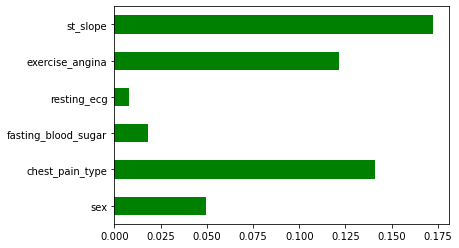

In [21]:
mutual_information.plot(kind = 'barh', color = 'green')

* Based on mutual information score, heart failure rate is highly depends on st_slope, chest_pain_type and exercise_angina

### Feature importance of numerical variable: Correlation coefficient
* Correlation coefficient - https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

In [22]:
corr_coefficient = df_full_train[numerical].corrwith(df_full_train.heart_diesease).abs()
corr_coefficient.sort_values(ascending=False)

max_heart_rate    0.428670
oldpeak           0.404741
age               0.263758
cholesterol       0.190729
resting_bp_s      0.127691
dtype: float64

In [23]:
corr_matrix = df_full_train.corr()
corr_matrix

,age,resting_bp_s,cholesterol,max_heart_rate,oldpeak,heart_diesease
age,1.000000,0.249151,-0.049688,-0.355585,0.235655,0.263758
resting_bp_s,0.249151,1.000000,0.092744,-0.099931,0.133356,0.127691
cholesterol,-0.049688,0.092744,1.000000,0.241490,0.056551,-0.190729
max_heart_rate,-0.355585,-0.099931,0.241490,1.000000,-0.181841,-0.428670
oldpeak,0.235655,0.133356,0.056551,-0.181841,1.000000,0.404741
heart_diesease,0.263758,0.127691,-0.190729,-0.428670,0.404741,1.000000


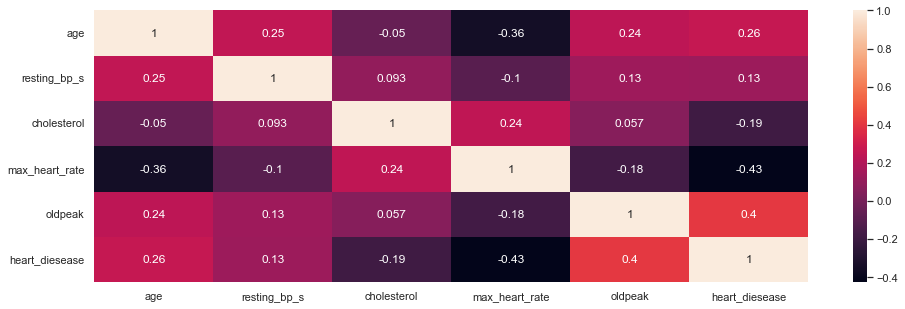

In [24]:
sns.set(rc = {'figure.figsize':(16,5)})
sns.heatmap(corr_matrix, annot=True)
plt.show()

* `Age`,`oldpeak` and `max heart rate` are having strong correlation with heart disease.

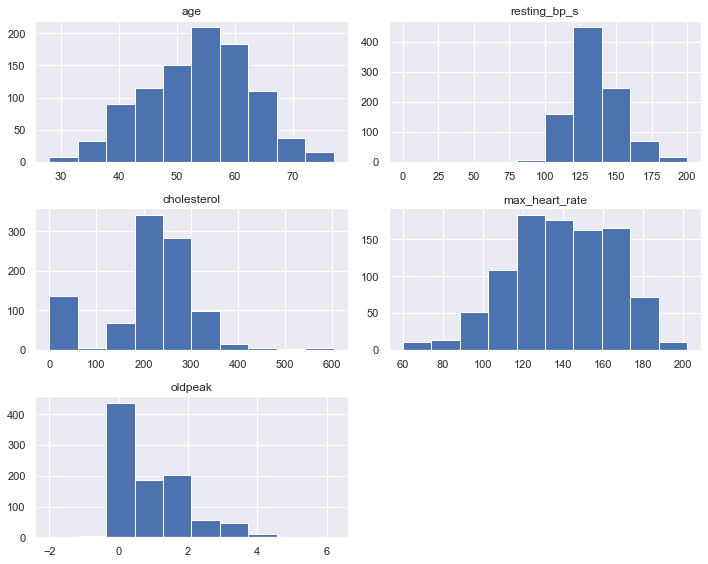

In [25]:
fig = df_full_train[numerical].hist(figsize=(10,8))
plt.tight_layout()
plt.show()

## one-hot encoding

In [26]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

test_dict = df_test.to_dict(orient='records')
X_test = dv.transform(test_dict)

### logistic regression
Lets train our first model as logistic regression model.

In [27]:
%%time
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 3.09 ms


LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [28]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred_p = model.predict(X_val)

In [29]:
heart_failure_prediction = (y_pred >= 0.5)

In [30]:
Initial_accuracy_o = (y_val == heart_failure_prediction).mean()

In [31]:
Initial_accuracy_o

0.8151260504201681

In [32]:
Initial_accuracy = round((y_val == heart_failure_prediction).mean(),2)

`Logistic regression has initial accuracy of 82%`

In [33]:
Initial_accuracy

0.82

### Small feature elimination
`lets eliminate some insignificant feature to see how it affect the accuracy.`

In [34]:
small_features = ['resting_ecg','fasting_blood_sugar','sex']
for feature in small_features:
    df_train_new = df_train[categorical + numerical].drop(feature,1)
    train_dict_new = df_train_new.to_dict(orient='records')
    X_train_new = dv.fit_transform(train_dict_new)

    df_val_new = df_val[categorical + numerical].drop(feature, axis = 1)
    val_dict_new= df_val_new.to_dict(orient='records')
    X_val_new = dv.transform(val_dict_new)
    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train_new, y_train)
    y_pred = model.predict_proba(X_val_new)[:, 1]
    heart_failure = (y_pred >= 0.5)
    new_model_accuracy = (y_val == heart_failure).mean()
    print(f'Feature:{feature} has {round(abs((Initial_accuracy_o-new_model_accuracy)),5)} difference from original accuracy, with new accuracy of {round(new_model_accuracy,4)}')

Feature:resting_ecg has 0.0042 difference from original accuracy, with new accuracy of 0.8109
Feature:fasting_blood_sugar has 0.0042 difference from original accuracy, with new accuracy of 0.8109
Feature:sex has 0.01261 difference from original accuracy, with new accuracy of 0.8277


C:\Users\460484\AppData\Local\Temp\ipykernel_6164\2353229573.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_train_new = df_train[categorical + numerical].drop(feature,1)
C:\Users\460484\AppData\Local\Temp\ipykernel_6164\2353229573.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_train_new = df_train[categorical + numerical].drop(feature,1)
C:\Users\460484\AppData\Local\Temp\ipykernel_6164\2353229573.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_train_new = df_train[categorical + numerical].drop(feature,1)


` Accuracy metric alone is sometime misleading to confirm the performance of the model. Lets judgement the performance based on the evaluation metrics (AUC score)`

In [35]:
def positive_rate(y_val,y_pred):
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    t = 0.5
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    #calculating tp,tn,fp,fn
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    #calculating tpr,fpr scores
    TPR_score = tp / (tp + fn)
    FPR_score = fp / (fp + tn)
    return TPR_score,FPR_score

In [36]:
tpr,fpr = positive_rate(y_val,y_pred)

accuracy score for Logistic reg: 0.8151260504201681
Precision score for Logistic reg: 0.796875
Recall score for Logistic reg: 0.85
F1 score for Logistic reg: 0.8225806451612903
Classification report for Logistic reg: 
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       118
           1       0.80      0.85      0.82       120

    accuracy                           0.82       238
   macro avg       0.82      0.81      0.81       238
weighted avg       0.82      0.82      0.81       238

Confusion matrix for Logistic reg: 
[[ 92  26]
 [ 18 102]]

Auc score for Logistic reg : 0.8866525423728814


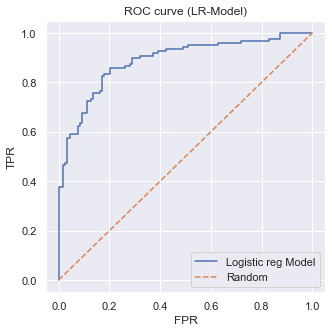

In [37]:
print ("accuracy score for Logistic reg: {}".format(accuracy_score(y_val, y_pred_p)))
print("Precision score for Logistic reg: {}".format(precision_score(y_val,y_pred_p)))
print("Recall score for Logistic reg: {}".format(recall_score(y_val,y_pred_p)))
print("F1 score for Logistic reg: {}".format(f1_score(y_val,y_pred_p)))
# print(f'TPR Score:{round(tpr,3)}')
# print(f'FPR Score:{round(fpr,3)}')
print("Classification report for Logistic reg: \n{}".format(classification_report(y_val, y_pred_p)))
print("Confusion matrix for Logistic reg: \n{}".format(confusion_matrix(y_val, y_pred_p)))
print()
print(f'Auc score for Logistic reg : {roc_auc_score(y_val, y_pred)}')
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Logistic reg Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve (LR-Model)')

plt.legend()

## Cross-Validation

In [38]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver="liblinear", C=C, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    return dv, model

In [39]:
dv, model = train(df_train, y_train, C=0.001)

In [40]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [41]:
y_pred = predict(df_val, dv, model)

In [42]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train_cv = df_full_train.iloc[train_idx]
        df_val_cv = df_full_train.iloc[val_idx]

        y_train_cv = df_train_cv.heart_diesease.values
        y_val_cv = df_val_cv.heart_diesease.values

        dv, model = train(df_train_cv, y_train_cv, C=C)
        y_pred_cv = predict(df_val_cv, dv, model)

        auc = roc_auc_score(y_val_cv, y_pred_cv)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.808 +- 0.024
C=0.01 0.892 +- 0.012
C=0.1 0.908 +- 0.009
C=0.5 0.909 +- 0.012
C=1 0.909 +- 0.013
C=5 0.908 +- 0.013
C=10 0.908 +- 0.013


In [43]:
print(f'Logistic regression CV auc scores:\n {scores}\n')
print(f'Logistic regression CV auc Scores mean: {round(np.mean(scores),3)}\n')
print(f'Logistic regression CV Scores standard deviation: {round(np.std(scores),3)}')

Logistic regression CV auc scores:
 [0.8870614035087719, 0.9291806958473625, 0.9054428555592507, 0.9118234250221827, 0.9078874179552786]

Logistic regression CV auc Scores mean: 0.908

Logistic regression CV Scores standard deviation: 0.013


`After Cross validation, Logistic regression has mean auc score of 0.908 and standard deviation of 0.013`

## Decision trees

In [44]:
dt_i = DecisionTreeClassifier()
dt_i.fit(X_train, y_train)

DecisionTreeClassifier()

In [45]:
y_pred = dt_i.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8444915254237289

In [46]:
y_pred = dt_i.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

In [47]:
print(export_text(dt_i, feature_names=dv.get_feature_names()))

|--- st_slope=Up <= 0.50
|   |--- chest_pain_type=ASY <= 0.50
|   |   |--- max_heart_rate <= 130.50
|   |   |   |--- sex=M <= 0.50
|   |   |   |   |--- max_heart_rate <= 105.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- max_heart_rate >  105.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- sex=M >  0.50
|   |   |   |   |--- resting_bp_s <= 130.50
|   |   |   |   |   |--- resting_bp_s <= 128.00
|   |   |   |   |   |   |--- max_heart_rate <= 101.00
|   |   |   |   |   |   |   |--- oldpeak <= 0.65
|   |   |   |   |   |   |   |   |--- exercise_angina=Yes <= 0.50
|   |   |   |   |   |   |   |   |   |--- fasting_blood_sugar=0 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- fasting_blood_sugar=0 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- age <= 54.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- age >  54.50
|   |   |   |   |   |   |   |   |   |   |   |---

C:\Users\460484\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [48]:
scores = []

for depth in [4, 5, 6, 10,15,20,30]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [49]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [50]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc                                          
max_depth            4      5      6      10     15     20     30
min_samples_leaf                                                 
1                 0.848  0.856  0.854  0.852  0.853  0.865  0.849
5                 0.853  0.858  0.858  0.872  0.881  0.875  0.872
10                0.881  0.868  0.875  0.881  0.872  0.871  0.881
15                0.893  0.890  0.887  0.888  0.887  0.887  0.887
20                0.884  0.879  0.880  0.877  0.875  0.877  0.877
100               0.829  0.829  0.829  0.829  0.829  0.829  0.829
200               0.814  0.814  0.814  0.814  0.814  0.814  0.814
500               0.500  0.500  0.500  0.500  0.500  0.500  0.500

<AxesSubplot:xlabel='None-max_depth', ylabel='min_samples_leaf'>

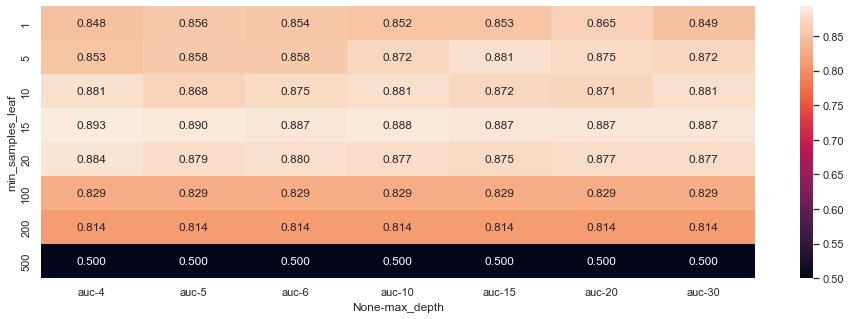

In [51]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

* We achieved the best score with max depth of 4 and min samples leaf of 15.

In [52]:
%%time
dt =DecisionTreeClassifier(max_depth=4, min_samples_leaf=15)
dt.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 1e+03 µs


DecisionTreeClassifier(max_depth=4, min_samples_leaf=15)

In [53]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- st_slope=Up <= 0.50
|   |--- chest_pain_type=ASY <= 0.50
|   |   |--- max_heart_rate <= 130.50
|   |   |   |--- exercise_angina=Yes <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- exercise_angina=Yes >  0.50
|   |   |   |   |--- class: 1
|   |   |--- max_heart_rate >  130.50
|   |   |   |--- sex=M <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- sex=M >  0.50
|   |   |   |   |--- class: 0
|   |--- chest_pain_type=ASY >  0.50
|   |   |--- sex=M <= 0.50
|   |   |   |--- resting_bp_s <= 142.50
|   |   |   |   |--- class: 1
|   |   |   |--- resting_bp_s >  142.50
|   |   |   |   |--- class: 1
|   |   |--- sex=M >  0.50
|   |   |   |--- max_heart_rate <= 147.50
|   |   |   |   |--- class: 1
|   |   |   |--- max_heart_rate >  147.50
|   |   |   |   |--- class: 1
|--- st_slope=Up >  0.50
|   |--- chest_pain_type=ASY <= 0.50
|   |   |--- cholesterol <= 153.00
|   |   |   |--- class: 0
|   |   |--- cholesterol >  153.00
|   |   |   |--- age <= 56.50
|   |   |   |   |--- class:

C:\Users\460484\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [54]:
y_pred = dt.predict_proba(X_val)[:, 1]
y_pred_p = dt.predict(X_val)
roc_auc_score(y_val, y_pred)

0.8928319209039548

accuracy score for DT: 0.8067226890756303
Precision score for DT: 0.8135593220338984
Recall score for DT: 0.8
F1 score for DT: 0.8067226890756303
Classification report for DT: 
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       118
           1       0.81      0.80      0.81       120

    accuracy                           0.81       238
   macro avg       0.81      0.81      0.81       238
weighted avg       0.81      0.81      0.81       238

Confusion matrix for DT: 
[[96 22]
 [24 96]]

Auc score for DT : 0.8928319209039548


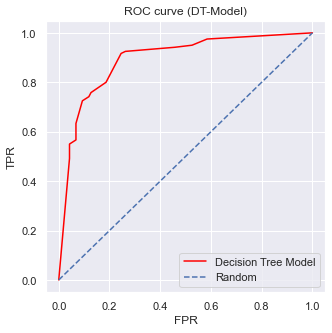

In [55]:
print ("accuracy score for DT: {}".format(accuracy_score(y_val, y_pred_p)))
print("Precision score for DT: {}".format(precision_score(y_val,y_pred_p)))
print("Recall score for DT: {}".format(recall_score(y_val,y_pred_p)))
print("F1 score for DT: {}".format(f1_score(y_val,y_pred_p)))
print("Classification report for DT: \n{}".format(classification_report(y_val, y_pred_p)))
print("Confusion matrix for DT: \n{}".format(confusion_matrix(y_val, y_pred_p)))
print()
print(f'Auc score for DT : {roc_auc_score(y_val, y_pred)}')
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Decision Tree Model',color= 'red')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve (DT-Model)')

plt.legend()

# Cross validation Decision Tree

In [56]:
def train_dt(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=15)
    model.fit(X_train, y_train)
    
    return dv, model

In [57]:
def predict_dt(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [58]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train_cv = df_full_train.iloc[train_idx]
        df_val_cv = df_full_train.iloc[val_idx]

        y_train_cv = df_train_cv.heart_diesease.values
        y_val_cv = df_val_cv.heart_diesease.values

        dv, model = train_dt(df_train_cv, y_train_cv, C=C)
        y_pred_cv = predict_dt(df_val_cv, dv, model)

        auc = roc_auc_score(y_val_cv, y_pred_cv)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.896 +- 0.015
C=0.01 0.896 +- 0.014
C=0.1 0.896 +- 0.014
C=0.5 0.896 +- 0.014
C=1 0.896 +- 0.015
C=5 0.896 +- 0.015
C=10 0.896 +- 0.015


In [59]:
print(f'Desicion tree CV auc scores:\n {scores}\n')
print(f'Desicion tree CV Scores mean: {round(np.mean(scores),3)}\n')
print(f'Desicion tree CV Scores standard deviation: {round(np.std(scores),3)}')

Desicion tree CV auc scores:
 [0.8824013157894737, 0.917283950617284, 0.8817758563352178, 0.9095496894409938, 0.890366002892424]

Desicion tree CV Scores mean: 0.896

Desicion tree CV Scores standard deviation: 0.015


`After Cross validation, Desicion tree has mean auc score of 0.896 and standard deviation of 0.015`

## Random forest model

In [60]:
%%time
scores = []

for n in range(10, 201, 10):
    rf = rf = RandomForestClassifier(n_estimators=n,random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

CPU times: total: 1.52 s
Wall time: 2.12 s


In [61]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

In [62]:
df_scores.sort_values('auc',ascending=False)

,n_estimators,auc
3,40,0.941455
6,70,0.939866
8,90,0.939336
18,190,0.938912
7,80,0.938877
19,200,0.938806
4,50,0.938489
11,120,0.938418
17,180,0.938312
1,20,0.938242


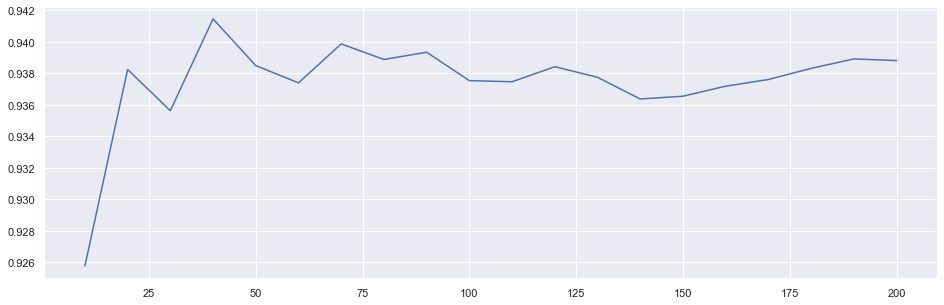

In [63]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [64]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [65]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

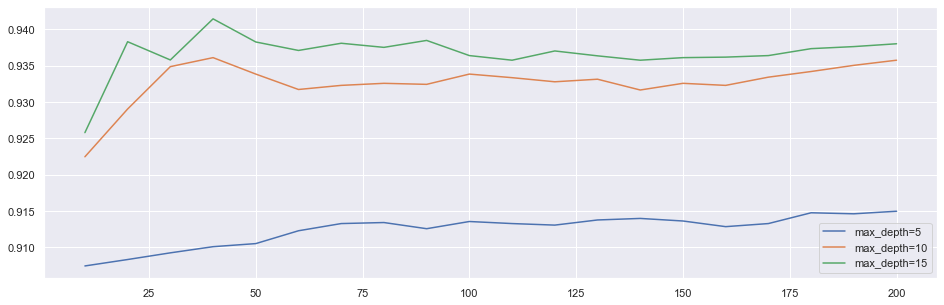

In [66]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

In [67]:
max_depth = 15

In [68]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [69]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

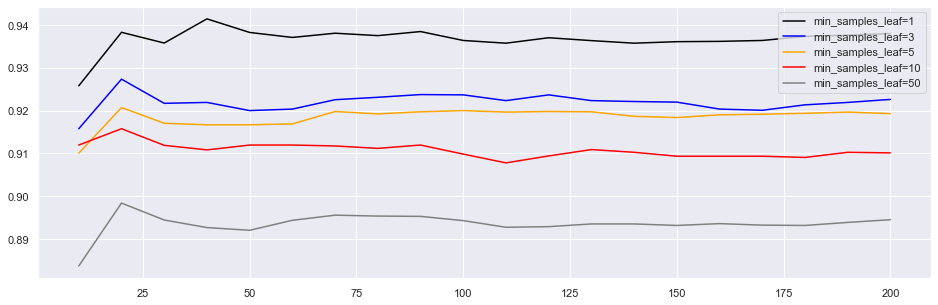

In [70]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [71]:
min_samples_leaf = 1

In [72]:
rf = RandomForestClassifier(n_estimators=40,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            bootstrap=False,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=15, n_estimators=40,
                       random_state=1)

In [73]:
y_pred = rf.predict_proba(X_val)[:, 1]
y_pred_p = rf.predict(X_val)
roc_auc_score(y_val, y_pred)

0.9475988700564972

accuracy score for RF: 0.8865546218487395
Precision score for RF: 0.872
Recall score for RF: 0.9083333333333333
F1 score for RF: 0.889795918367347
Classification report for RF: 
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       118
           1       0.87      0.91      0.89       120

    accuracy                           0.89       238
   macro avg       0.89      0.89      0.89       238
weighted avg       0.89      0.89      0.89       238

Confusion matrix for RF: 
[[102  16]
 [ 11 109]]

Auc score for RF : 0.9475988700564972


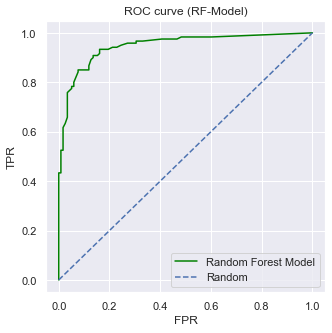

In [74]:
print ("accuracy score for RF: {}".format(accuracy_score(y_val, y_pred_p)))
print("Precision score for RF: {}".format(precision_score(y_val,y_pred_p)))
print("Recall score for RF: {}".format(recall_score(y_val,y_pred_p)))
print("F1 score for RF: {}".format(f1_score(y_val,y_pred_p)))
print("Classification report for RF: \n{}".format(classification_report(y_val, y_pred_p)))
print("Confusion matrix for RF: \n{}".format(confusion_matrix(y_val, y_pred_p)))
print()
print(f'Auc score for RF : {roc_auc_score(y_val, y_pred)}')
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Random Forest Model',color= 'green')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve (RF-Model)')

plt.legend()

## Cross validation Random Forest

In [75]:
def train_rf(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = RandomForestClassifier(n_estimators=40,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            bootstrap=False,
                            random_state=1)
    model.fit(X_train, y_train)
    
    return dv, model

In [76]:
def predict_rf(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [77]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train_cv = df_full_train.iloc[train_idx]
        df_val_cv = df_full_train.iloc[val_idx]

        y_train_cv = df_train_cv.heart_diesease.values
        y_val_cv = df_val_cv.heart_diesease.values

        dv, model = train_rf(df_train_cv, y_train_cv, C=C)
        y_pred_cv = predict_rf(df_val_cv, dv, model)

        auc = roc_auc_score(y_val_cv, y_pred_cv)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.956 +- 0.010
C=0.01 0.956 +- 0.010
C=0.1 0.956 +- 0.010
C=0.5 0.956 +- 0.010
C=1 0.956 +- 0.010
C=5 0.956 +- 0.010
C=10 0.956 +- 0.010


In [78]:
print(f'Random forest CV auc scores:\n {scores}\n')
print(f'Random forest CV Scores mean: {round(np.mean(scores),3)}\n')
print(f'Random forest CV Scores standard deviation: {round(np.std(scores),3)}')

Random forest CV auc scores:
 [0.9474780701754386, 0.9750841750841751, 0.9506706573550605, 0.9498114463176575, 0.9581154744687952]

Random forest CV Scores mean: 0.956

Random forest CV Scores standard deviation: 0.01


`After Cross validation, Random forest has mean auc score of 0.956 and standard deviation of 0.01`

## Extra trees classification
* lets train a base model

In [79]:
et = ExtraTreesClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=1)
et.fit(X_train, y_train)

ExtraTreesClassifier(n_estimators=10, random_state=1)

In [80]:
y_pred = et.predict_proba(X_val)[:, 1]
y_pred_p = et.predict(X_val)
roc_auc_score(y_val, y_pred)

0.9516949152542373

### Lets do the parameter tuning

In [81]:
%%time
scores = []

for n in range(10, 201, 10):
    et = ExtraTreesClassifier(n_estimators=n,random_state=1)
    et.fit(X_train, y_train)

    y_pred = et.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

CPU times: total: 1.09 s
Wall time: 1.75 s


In [82]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

In [83]:
df_scores.sort_values('auc',ascending=False)

,n_estimators,auc
4,50,0.957592
3,40,0.957521
7,80,0.957451
6,70,0.956815
5,60,0.956427
8,90,0.955614
9,100,0.955438
11,120,0.954449
10,110,0.954343
13,140,0.953884


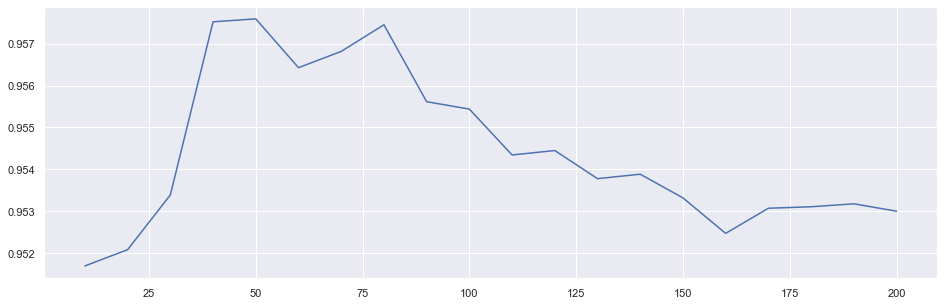

In [84]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [85]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        et = ExtraTreesClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        et.fit(X_train, y_train)

        y_pred = et.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [86]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

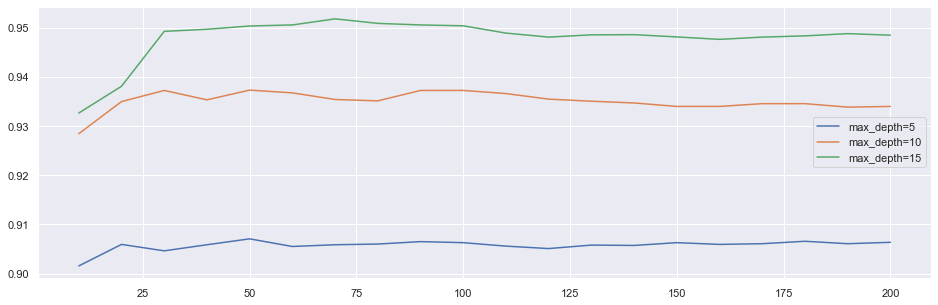

In [87]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

In [88]:
max_depth = 15

In [89]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        et = ExtraTreesClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        et.fit(X_train, y_train)

        y_pred = et.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [90]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

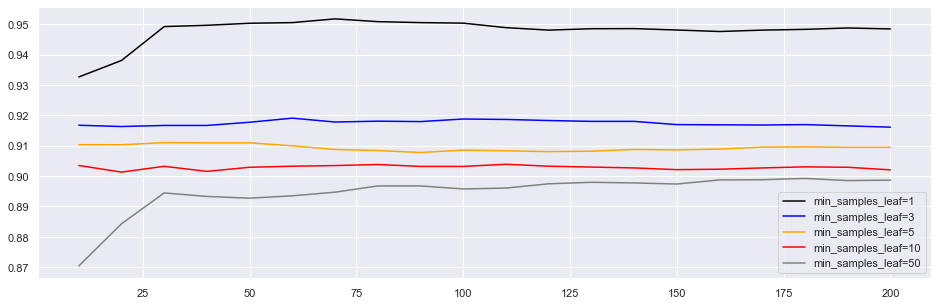

In [91]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [92]:
min_samples_leaf = 1

In [93]:
et = ExtraTreesClassifier(n_estimators=50,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
et.fit(X_train, y_train)

ExtraTreesClassifier(n_estimators=50, random_state=1)

In [94]:
y_pred = et.predict_proba(X_val)[:, 1]
y_pred_p = et.predict(X_val)
roc_auc_score(y_val, y_pred)

0.9575918079096044

accuracy score for ET: 0.8865546218487395
Precision score for ET: 0.8780487804878049
Recall score for ET: 0.9
F1 score for ET: 0.888888888888889
Classification report for ET: 
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       118
           1       0.88      0.90      0.89       120

    accuracy                           0.89       238
   macro avg       0.89      0.89      0.89       238
weighted avg       0.89      0.89      0.89       238

Confusion matrix for ET: 
[[103  15]
 [ 12 108]]

Auc score for ET : 0.9575918079096044


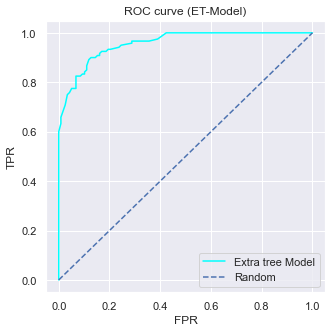

In [95]:
print ("accuracy score for ET: {}".format(accuracy_score(y_val, y_pred_p)))
print("Precision score for ET: {}".format(precision_score(y_val,y_pred_p)))
print("Recall score for ET: {}".format(recall_score(y_val,y_pred_p)))
print("F1 score for ET: {}".format(f1_score(y_val,y_pred_p)))
print("Classification report for ET: \n{}".format(classification_report(y_val, y_pred_p)))
print("Confusion matrix for ET: \n{}".format(confusion_matrix(y_val, y_pred_p)))
print()
print(f'Auc score for ET : {roc_auc_score(y_val, y_pred)}')
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Extra tree Model',color= 'cyan')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve (ET-Model)')

plt.legend()

## Cross validation Extra trees

In [96]:
def train_et(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = ExtraTreesClassifier(n_estimators=50,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
    model.fit(X_train, y_train)
    
    return dv, model

In [97]:
def predict_et(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [98]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train_cv = df_full_train.iloc[train_idx]
        df_val_cv = df_full_train.iloc[val_idx]

        y_train_cv = df_train_cv.heart_diesease.values
        y_val_cv = df_val_cv.heart_diesease.values

        dv, model = train_et(df_train_cv, y_train_cv, C=C)
        y_pred_cv = predict_et(df_val_cv, dv, model)

        auc = roc_auc_score(y_val_cv, y_pred_cv)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.957 +- 0.010
C=0.01 0.957 +- 0.010
C=0.1 0.957 +- 0.010
C=0.5 0.957 +- 0.010
C=1 0.957 +- 0.010
C=5 0.957 +- 0.010
C=10 0.957 +- 0.010


In [99]:
print(f'Extra Trees CV auc scores:\n {scores}\n')
print(f'Extra Trees CV Scores mean: {round(np.mean(scores),3)}\n')
print(f'Extra Trees CV Scores standard deviation: {round(np.std(scores),3)}')

Extra Trees CV auc scores:
 [0.9546600877192982, 0.9733445566778901, 0.9592617226471566, 0.9407165039929015, 0.9578929803092668]

Extra Trees CV Scores mean: 0.957

Extra Trees CV Scores standard deviation: 0.01


`After Cross validation, Extra trees has mean auc score of 0.957 and standard deviation of 0.01`

# Gradient boosting and XGBoost

In [100]:
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

C:\Users\460484\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [101]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=15)

[19:42:01] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [102]:
y_pred = model.predict(dval)

In [103]:
roc_auc_score(y_val, y_pred)

0.9328389830508474

## Gradient Boosting Model finetuning

In [104]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [105]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    #'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [106]:
s = output.stdout

In [107]:
print(s[:200])

[0]	train-auc:0.94439	val-auc:0.86935
[5]	train-auc:0.98660	val-auc:0.91850
[10]	train-auc:0.99555	val-auc:0.92818
[15]	train-auc:0.99819	val-auc:0.93390
[20]	train-auc:0.99961	val-auc:0.92811
[25]	tr


In [108]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [109]:
df_score = parse_xgb_output(output)

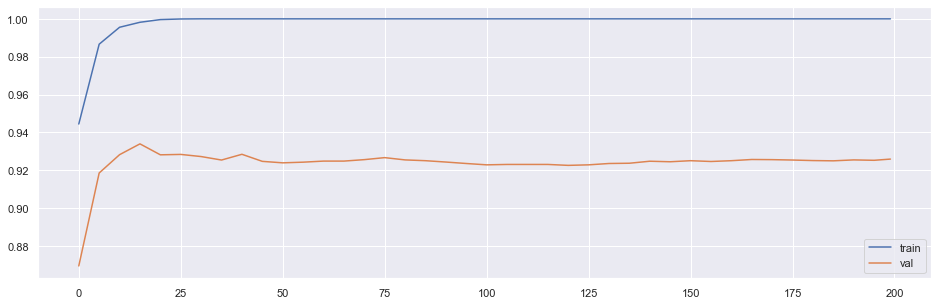

In [110]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

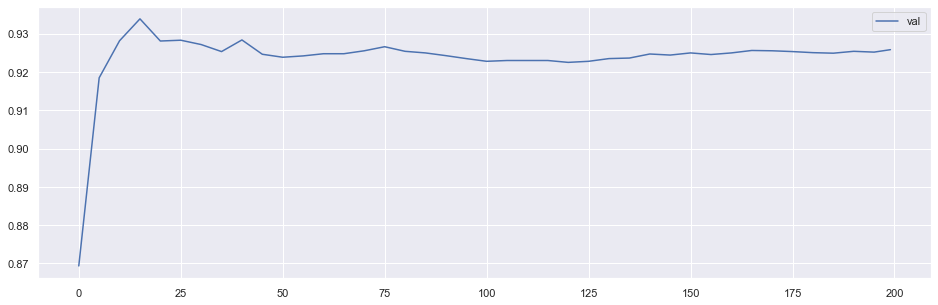

In [111]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

In [112]:
df_score[df_score.val_auc == df_score.val_auc.max()]

,num_iter,train_auc,val_auc
3,15,0.99819,0.9339


In [113]:
scores = {}
etas = [0.01, 0.1, 0.3, 0.5]

In [114]:
%%capture output

xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    #'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [115]:
scores = {}

In [116]:
key = f'eta={etas[0]}'
print(f'key = {key}')
scores[key] = parse_xgb_output(output)

key = eta=0.01


In [117]:
%%capture output

xgb_params['eta'] = etas[1]

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [118]:
key = f'eta={etas[1]}'
print(f'key = {key}')
scores[key] = parse_xgb_output(output)

key = eta=0.1


In [119]:
%%capture output

xgb_params['eta'] = etas[2]

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [120]:
key = f'eta={etas[2]}'
print(f'key = {key}')
scores[key] = parse_xgb_output(output)

key = eta=0.3


In [121]:
%%capture output

xgb_params['eta'] = etas[3]

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [122]:
key = f'eta={etas[3]}'
print(f'key = {key}')
scores[key] = parse_xgb_output(output)

key = eta=0.5


In [123]:
scores.keys()

dict_keys(['eta=0.01', 'eta=0.1', 'eta=0.3', 'eta=0.5'])

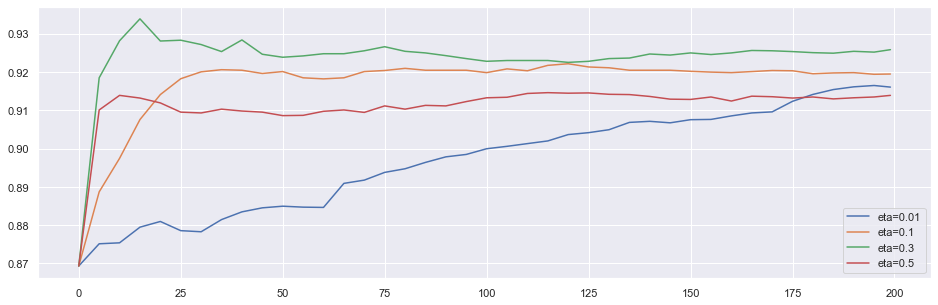

In [124]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()

### Default `eta` value of `0.3` is best parameter among other value

### lets tune the max_depth parameter

In [125]:
scores = {}
depths = [1, 2, 4, 6, 8, 10, 12, 15]

In [126]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 1,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    #'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [127]:
key = f'max_depth={depths[0]}'
print(f'key = {key}')
scores[key] = parse_xgb_output(output)

key = max_depth=1


In [128]:
%%capture output

xgb_params['max_depth'] = depths[1]

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [129]:
key = f'max_depth={depths[1]}'
print(f'key = {key}')
scores[key] = parse_xgb_output(output)

key = max_depth=2


In [130]:
%%capture output

xgb_params['max_depth'] = depths[2]

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [131]:
key = f'max_depth={depths[2]}'
print(f'key = {key}')
scores[key] = parse_xgb_output(output)

key = max_depth=4


In [132]:
%%capture output
xgb_params['max_depth'] = depths[3]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [133]:
key = f'max_depth={depths[3]}'
print(f'key = {key}')
scores[key] = parse_xgb_output(output)

key = max_depth=6


In [134]:
%%capture output
xgb_params['max_depth'] = depths[4]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [135]:
key = f'max_depth={depths[4]}'
print(f'key = {key}')
scores[key] = parse_xgb_output(output)

key = max_depth=8


In [136]:
%%capture output
xgb_params['max_depth'] = depths[5]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [137]:
key = f'max_depth={depths[5]}'
print(f'key = {key}')
scores[key] = parse_xgb_output(output)

key = max_depth=10


In [138]:
%%capture output
xgb_params['max_depth'] = depths[6]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [139]:
key = f'max_depth={depths[6]}'
print(f'key = {key}')
scores[key] = parse_xgb_output(output)

key = max_depth=12


In [140]:
%%capture output
xgb_params['max_depth'] = depths[7]
model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=watchlist)

In [141]:
key = f'max_depth={depths[7]}'
print(f'key = {key}')
scores[key] = parse_xgb_output(output)

key = max_depth=15


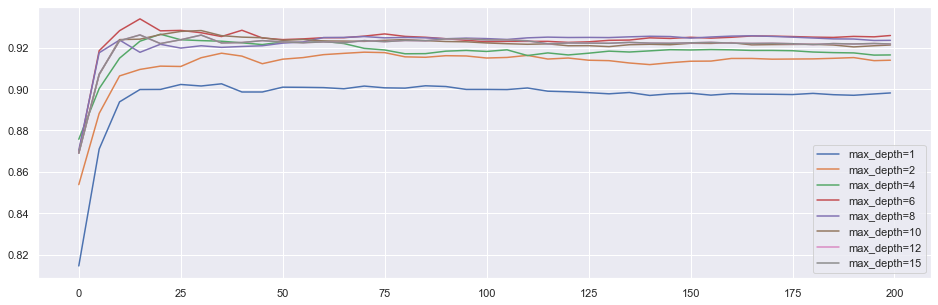

In [142]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()

### Default `max_depth` value of `6` is best parameter among other value

### Final model based on parameter tuning

In [143]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    #'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=15)
y_pred = model.predict(dval)

accuracy score for XGB: 0.8865546218487395
Precision score for XGB: 0.8780487804878049
Recall score for XGB: 0.9
F1 score for XGB: 0.888888888888889
Classification report for XGB: 
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       118
           1       0.88      0.90      0.89       120

    accuracy                           0.89       238
   macro avg       0.89      0.89      0.89       238
weighted avg       0.89      0.89      0.89       238

Confusion matrix for XGB: 
[[103  15]
 [ 12 108]]

Auc score for XGB : 0.9328389830508474


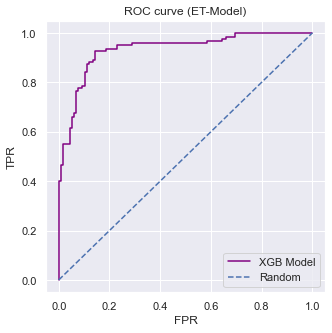

In [144]:
print ("accuracy score for XGB: {}".format(accuracy_score(y_val, y_pred_p)))
print("Precision score for XGB: {}".format(precision_score(y_val,y_pred_p)))
print("Recall score for XGB: {}".format(recall_score(y_val,y_pred_p)))
print("F1 score for XGB: {}".format(f1_score(y_val,y_pred_p)))
print("Classification report for XGB: \n{}".format(classification_report(y_val, y_pred_p)))
print("Confusion matrix for XGB: \n{}".format(confusion_matrix(y_val, y_pred_p)))
print()
print(f'Auc score for XGB : {roc_auc_score(y_val, y_pred)}')
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='XGB Model',color= 'purple')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve (ET-Model)')

plt.legend()

### Gradient Boosting cross-validation

In [145]:
def train_gb(df_train, y_train, xgb_params):
    dict = df_train.to_dict(orient='records')

    dv = DictVectorizer(sparse=False)

    X_train = dv.fit_transform(dict)

    features = dv.get_feature_names()

    dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)

    model = xgb.train(xgb_params, dtrain, num_boost_round=15)
    
    return dv, features, model

def predict_gb(df, y_val, dv, features, model):
    dict = df.to_dict(orient='records')

    X = dv.transform(dict)

    dval = xgb.DMatrix(X, label=y_val, feature_names=features)

    y_pred = model.predict(dval)

    return y_pred

In [146]:
n_splits = 5

scores = []

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    #'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.heart_diesease.values
    y_val = df_val.heart_diesease.values

    del df_train['heart_diesease']
    del df_val['heart_diesease']

    dv, features, model = train_gb(df_train, y_train, xgb_params)
    y_pred = predict_gb(df_val, y_val, dv, features, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

C:\Users\460484\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\460484\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\460484\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\460484\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; ge

In [147]:
print(f'XGB CV auc scores:\n {scores}\n')
print(f'XGB CV Scores mean: {round(np.mean(scores),3)}\n')
print(f'XGB CV Scores standard deviation: {round(np.std(scores),3)}')

XGB CV auc scores:
 [0.919188596491228, 0.9529741863075195, 0.9327125595831948, 0.9274622892635315, 0.9419290243631105]

XGB CV Scores mean: 0.935

XGB CV Scores standard deviation: 0.012


### Final model selection

| Model Name | Initial AUC score | CV mean of AUC score  |CV standard deviation of AUC score|
|:---        |    :----:         |  :----:               |          ---:|
| Logistic Regression| 0.887 | 0.908 |0.013|
|Decision Trees|0.892|0.896|0.015|
|Random Forest|0.947|0.956|0.01|
|Extra Trees|`0.957`|`0.957`|0.01|
|XG Boost|0.933|0.935|0.012|

### Based on this data,  Extra trees and random forest models are performing better when compared to other models.But we need to train these 5 models with our full train dataset and confirm them with the test dataset.

In [148]:
df_full_train = df_full_train.reset_index(drop=True)
y_full_train = df_full_train.heart_diesease.values
del df_full_train['heart_diesease']

In [149]:
dict_f = df_full_train.to_dict(orient='records')
dv_f = DictVectorizer(sparse=False)
X_full_train = dv_f.fit_transform(dict_f)

In [150]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=dv_f.get_feature_names())
dtest = xgb.DMatrix(X_test, feature_names=dv_f.get_feature_names())

C:\Users\460484\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Logistic Regression

Auc score for LR : 0.9404128537986807


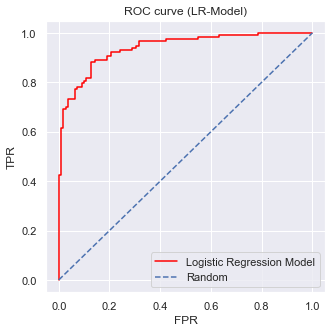

In [151]:
lr = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
lr.fit(X_full_train, y_full_train)
y_pred = lr.predict_proba(X_test)[:, 1]
print(f'Auc score for LR : {roc_auc_score(y_test, y_pred)}')
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Logistic Regression Model',color= 'red')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve (LR-Model)')

plt.legend()

### Decision Trees

Auc score for DT : 0.9293466695041499


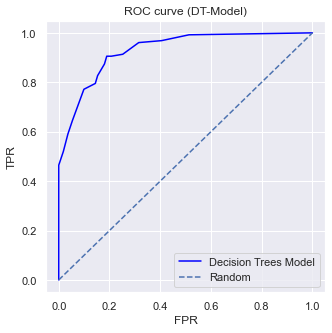

In [152]:
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=15)
dt.fit(X_full_train, y_full_train)
y_pred = dt.predict_proba(X_test)[:, 1]
print(f'Auc score for DT : {roc_auc_score(y_test, y_pred)}')
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Decision Trees Model',color= 'blue')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve (DT-Model)')

plt.legend()

### Random Forest model

Auc score for RF : 0.9893594381783358


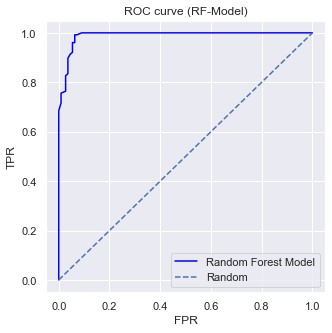

In [153]:
rf = RandomForestClassifier(n_estimators=40,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            bootstrap=False,
                            random_state=1)
rf.fit(X_full_train, y_full_train)
y_pred = rf.predict_proba(X_test)[:, 1]
print(f'Auc score for RF : {roc_auc_score(y_test, y_pred)}')
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Random Forest Model',color= 'blue')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve (RF-Model)')

plt.legend()

### Extra trees model

Auc score for RF : 0.9894303752571469


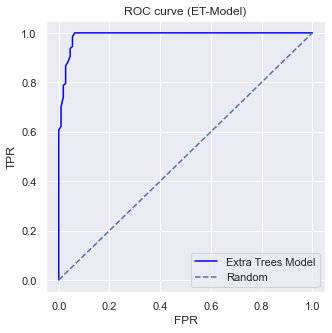

In [154]:
et = ExtraTreesClassifier(n_estimators=50,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
et.fit(X_full_train, y_full_train)
y_pred = et.predict_proba(X_test)[:, 1]
print(f'Auc score for RF : {roc_auc_score(y_test, y_pred)}')
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Extra Trees Model',color= 'blue')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve (ET-Model)')

plt.legend()

### Gradient Boosting Model

Auc score for G Boost : 0.976803575228772


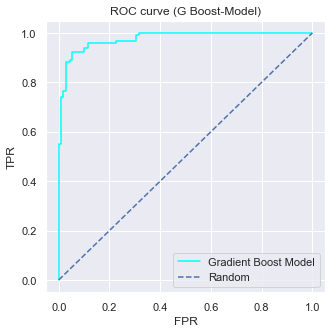

In [155]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    #'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dfulltrain, num_boost_round=15)
y_pred = model.predict(dtest)
print(f'Auc score for G Boost : {roc_auc_score(y_test, y_pred)}')
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Gradient Boost Model',color= 'cyan')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve (G Boost-Model)')

plt.legend()

### Based on the results, Extra trees model is best model with AUC score of `0.989` with following parameters:

### `ExtraTreesClassifier(n_estimators=50,min_samples_leaf=min_samples_leaf,random_state=1)`

## Saving Final bentoml model

In [156]:
# final_model = et.fit(X_full_train, y_full_train)

In [157]:
# import bentoml

In [158]:
# bentoml.sklearn

In [159]:
# bentoml.sklearn.save_model(
#     'Heart_failure_prediction',
#     final_model,
#     custom_objects={
#         'dictVectorizer': dv
#     })

In [160]:
# import json

In [161]:
# request = df_test.iloc[0].to_dict()
# print(json.dumps(request, indent=2))